⏳ Laddar MNIST-data...

🚀 Startar modellträning...

🔹 Tränar: Logistic Regression
   ✔ Klar — Accuracy: 0.8881

🔹 Tränar: Random Forest
   ✔ Klar — Accuracy: 0.9639

🔹 Tränar: MLP Neural Network
   ✔ Klar — Accuracy: 0.8553

🔹 Tränar: Extra Trees
   ✔ Klar — Accuracy: 0.9673

🔹 Tränar: AdaBoost
   ✔ Klar — Accuracy: 0.7165


📊 RESULTAT – SORTERAT

Extra Trees              : 0.9673
Random Forest            : 0.9639
Logistic Regression      : 0.8881
MLP Neural Network       : 0.8553
AdaBoost                 : 0.7165


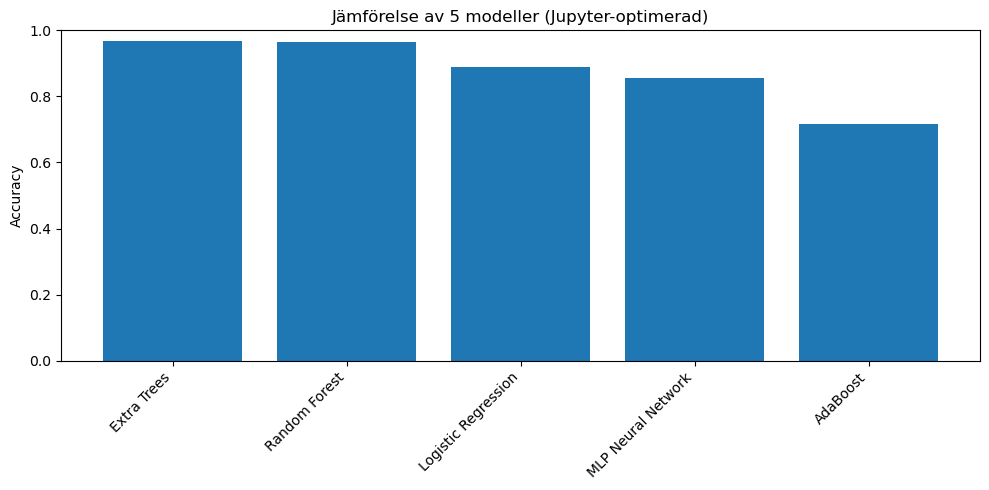


🏆 BÄSTA MODELLEN:
Extra Trees – accuracy 0.9673


In [1]:
%matplotlib inline

import numpy as np
import warnings
warnings.filterwarnings("ignore")

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# ======================================
# 1. Ladda MNIST
# ======================================
print("⏳ Laddar MNIST-data...")
mnist = fetch_openml("mnist_784", version=1, as_frame=False, cache=True)
X = mnist["data"]
y = mnist["target"].astype(np.uint8)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Mindre dataset för tunga modeller
X_small = X_train[:5000]
y_small = y_train[:5000]

# ======================================
# 2. Definiera 5 modeller
# ======================================
models = {
    "Logistic Regression": LogisticRegression(max_iter=100, solver="saga", n_jobs=-1),
    "Random Forest": RandomForestClassifier(n_estimators=50, n_jobs=-1, random_state=42),
    "MLP Neural Network": MLPClassifier(hidden_layer_sizes=(80,), max_iter=15),
    "Extra Trees": ExtraTreesClassifier(n_estimators=50, n_jobs=-1, random_state=42),
    "AdaBoost": AdaBoostClassifier()
}

# ======================================
# 3. Träna & utvärdera modeller
# ======================================
results = {}
print("\n🚀 Startar modellträning...\n")

for name, model in models.items():
    print(f"🔹 Tränar: {name}")

    # Mindre dataset för tunga modeller
    if name in ["Logistic Regression", "MLP Neural Network"]:
        model.fit(X_small, y_small)
    else:
        model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc

    print(f"   ✔ Klar — Accuracy: {acc:.4f}\n")

# ======================================
# 4. Sortera resultat
# ======================================
sorted_results = sorted(results.items(), key=lambda x: x[1], reverse=True)

print("\n==============================")
print("📊 RESULTAT – SORTERAT")
print("==============================\n")
for name, acc in sorted_results:
    print(f"{name:<25}: {acc:.4f}")

# ======================================
# 5. Sammanfattande graf
# ======================================
plt.figure(figsize=(10, 5))
plt.bar([name for name, _ in sorted_results],
        [acc for _, acc in sorted_results])
plt.xticks(rotation=45, ha='right')
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.title("Jämförelse av 5 modeller (Jupyter-optimerad)")
plt.tight_layout()
plt.show()

# ======================================
# 6. Visa bästa modell
# ======================================
best_name, best_acc = sorted_results[0]
print("\n🏆 BÄSTA MODELLEN:")
print(f"{best_name} – accuracy {best_acc:.4f}")
